In [96]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from copy import deepcopy
import numpy as np
%matplotlib inline

In [6]:
os.getcwd()

'/network/scratch/w/weissmar/tn/info-bazaar/notebooks'

In [7]:
dataset = json.load(open("../data/dataset.json", "r"))
vendors = json.load(open("../data/vendors.json", "r"))

In [78]:
# concept_df['score'].hist(bins=20)

In [ ]:
vendors.keys()

In [83]:
concept_levels = defaultdict(lambda: defaultdict(list))
for arxiv_id, blob in dataset.items():
    for concept in blob['concepts']:
        if concept["score"] < 0.4: 
            continue
        concept_levels[concept["level"]][concept["display_name"]].append(arxiv_id)

In [ ]:
# score for vendor popularity - frequency of papers
# score for vendor quality - total citations
# score for popularity of concept, stratified by levels
# ---
# sample papers based according to these scores


In [84]:
concept_popularity_scores = deepcopy(concept_levels)
for level, concepts_at_level in concept_popularity_scores.items():
    for concept, papers in concepts_at_level.items(): 
        popularity_for_this_concept = len(concept_levels[level][concept])
        popularity_for_all_concepts_at_this_level = sum([len(papers) for papers in concept_levels[level].values()])
        concept_popularity_scores[level][concept] = popularity_for_this_concept / popularity_for_all_concepts_at_this_level

In [65]:
# 9158 is the sum(vendor_popularity_scores.values()) 
vendor_popularity_scores = {key: len(values['papers'])/9158 for key, values in vendors.items()}

In [67]:
max(vendor_popularity_scores.values())

0.016925092815025116

In [111]:
score_for_papers = {}
scores = []
for arxiv_id, blob in dataset.items(): 
    all_affiliation_ids = [
        institution["id"].replace("https://openalex.org/", "") for author in blob["authorships"] for institution in author["institutions"]
    ]
    all_affiliation_scores = [vendor_popularity_scores[aff_id] for aff_id in all_affiliation_ids]
    mean_affiliation_score = np.mean(all_affiliation_scores)
    all_concept_scores = []
    for concept in blob["concepts"]:
        if concept["score"] < 0.4: 
            continue
        all_concept_scores.append(concept_popularity_scores[concept["level"]][concept["display_name"]])
    mean_concept_score = np.mean(all_concept_scores)
    weighted_score = 0.5 * mean_affiliation_score + 0.5 * mean_concept_score
    if np.isnan(weighted_score):
        continue
    score_for_papers[arxiv_id] = weighted_score
    scores.append(dict(arxiv_id=arxiv_id, score=weighted_score))

/home/mila/w/weissmar/.conda/envs/tn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mila/w/weissmar/.conda/envs/tn/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [116]:
scores_df = pd.DataFrame(scores)

array([[<AxesSubplot: title={'center': 'score'}>]], dtype=object)

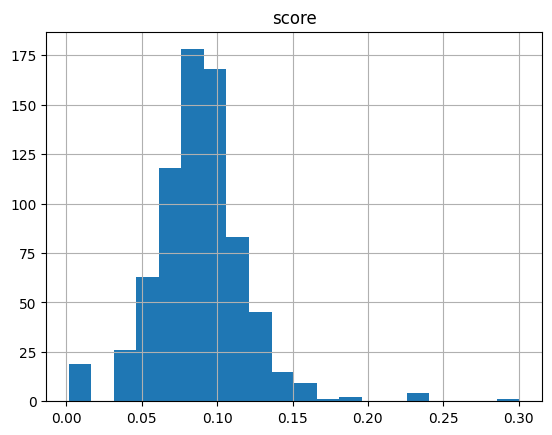

In [117]:
scores_df.hist(bins=20)

array([[<AxesSubplot: title={'center': 'score'}>]], dtype=object)

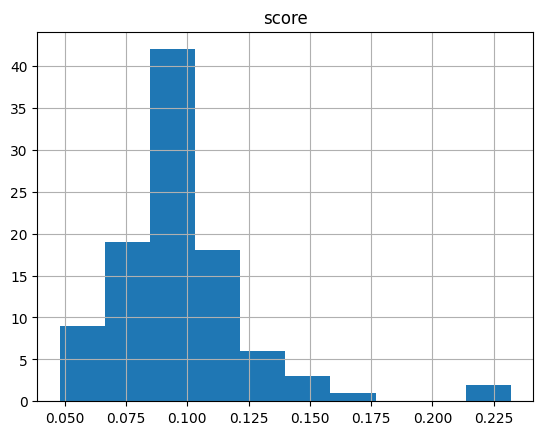

In [125]:
scores_df[scores_df['arxiv_id'].isin(sampled_papers)].hist()

In [157]:
paper_samples = []
for _ in range(10): 
    normalised_probas = np.asarray(scores_df["score"])
    normalised_probas = normalised_probas / normalised_probas.sum()
    sampled_papers = np.random.choice(scores_df["arxiv_id"].tolist(), p=normalised_probas, replace=False, size=100)
    paper_samples.append(sampled_papers.tolist())

In [158]:
with open("../data/paper_samples_concept_0.4_n_100_weighting_50_inst_50_conc.json", "w") as f: 
    json.dump(paper_samples, f)

In [150]:
cons = [[c["display_name"] for c in blob["concepts"] if c["score"] > 0.4 and c["display_name"] in concept_levels[3]] for blob in dataset.values() if blob["arxiv_id"] in sampled_papers]
flat_cons = [_c for c in cons for _c in c]
Counter(flat_cons).most_common()

[('Star formation', 18),
 ('Luminosity', 16),
 ('Redshift', 14),
 ('Interstellar medium', 10),
 ('Metallicity', 10),
 ('Active galactic nucleus', 8),
 ('Quasar', 6),
 ('Photometry (optics)', 6),
 ('Halo', 6),
 ('Galaxy formation and evolution', 6),
 ('Galaxy cluster', 5),
 ('Radial velocity', 5),
 ('Exoplanet', 4),
 ('Gravitational microlensing', 4),
 ('Blazar', 4),
 ('Ejecta', 3),
 ('Starspot', 3),
 ('Rotation period', 3),
 ('Planetary system', 3),
 ('Binary black hole', 3),
 ('Luminous infrared galaxy', 3),
 ('Velocity dispersion', 3),
 ('Milky Way', 3),
 ('Cold dark matter', 3),
 ('Spiral galaxy', 3),
 ('Supermassive black hole', 3),
 ('Molecular cloud', 2),
 ('Magnetar', 2),
 ('Elliptical galaxy', 2),
 ('Cooling flow', 2),
 ('Radio galaxy', 2),
 ('Magnetic flux', 2),
 ('Supergiant', 2),
 ('LIGO', 2),
 ('T Tauri star', 2),
 ('Dwarf galaxy', 2),
 ('Nucleosynthesis', 2),
 ('Type II supernova', 2),
 ('Galactic Center', 2),
 ('Fast radio burst', 2),
 ('Stellar rotation', 2),
 ('White dw

In [151]:
cons = [[c["display_name"] for c in blob["concepts"] if c["score"] > 0.4 and c["display_name"] in concept_levels[3]] for blob in np.random.choice(list(dataset.values()), size=100)]
flat_cons = [_c for c in cons for _c in c]
Counter(flat_cons).most_common()

[('Redshift', 10),
 ('Halo', 8),
 ('Milky Way', 7),
 ('Magnetic reconnection', 7),
 ('Dark energy', 7),
 ('Metallicity', 6),
 ('Luminosity', 6),
 ('Corona (planetary geology)', 5),
 ('Cold dark matter', 5),
 ('Star formation', 5),
 ('Galaxy formation and evolution', 5),
 ('Galaxy cluster', 5),
 ('Stellar evolution', 5),
 ('Exoplanet', 5),
 ('Chromosphere', 4),
 ('Galactic plane', 4),
 ('Magnetohydrodynamics', 4),
 ('Rotation period', 4),
 ('Photometry (optics)', 4),
 ('Emission spectrum', 3),
 ('Globular cluster', 3),
 ('Ejecta', 3),
 ('Blazar', 3),
 ('Quasar', 3),
 ('Active galactic nucleus', 3),
 ('Solar observatory', 2),
 ('Cosmic microwave background', 2),
 ('Cosmological perturbation theory', 2),
 ('Spectral energy distribution', 2),
 ('Low Mass', 2),
 ('Dynamo', 2),
 ('T Tauri star', 2),
 ('Planetary system', 2),
 ('Gravitational microlensing', 2),
 ('Magnetic flux', 2),
 ('Field line', 2),
 ('Stellar rotation', 2),
 ('Starspot', 2),
 ('Magnetar', 2),
 ('Fast radio burst', 2),
 (

In [29]:
all_concepts = {}
concept_map = defaultdict(list)
for arxiv_id, blob in dataset.items():
    for concept in blob['concepts']:
        concept_map[concept["display_name"]].append(arxiv_id)
        all_concepts[concept['display_name']] = concept


In [35]:
concepts = []
for arxiv_id, blob in dataset.items():
    for concept in blob['concepts']:
        concept["arxiv_id"] = arxiv_id
        concepts.append(concept)



In [37]:
concept_df = pd.DataFrame(concepts)

In [41]:
len(concept_df)

12044

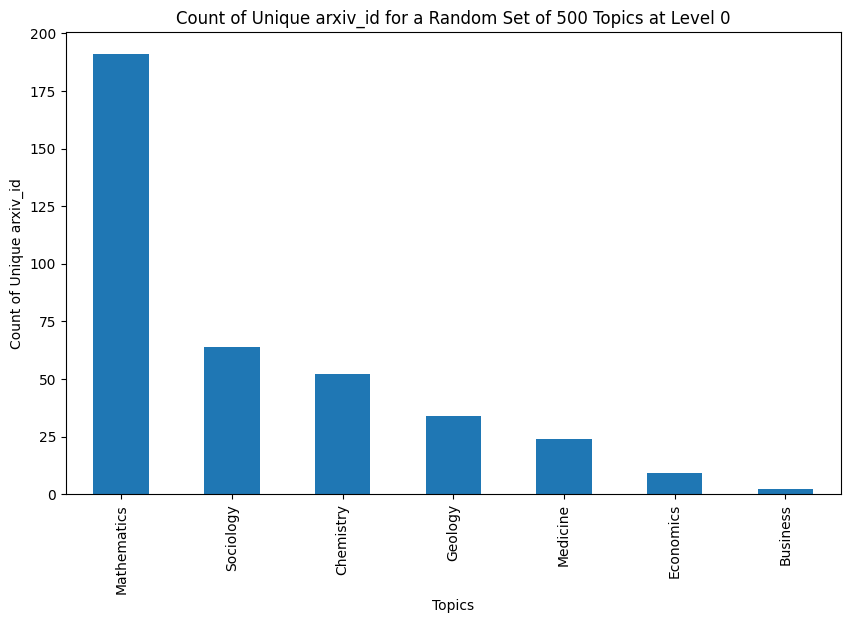

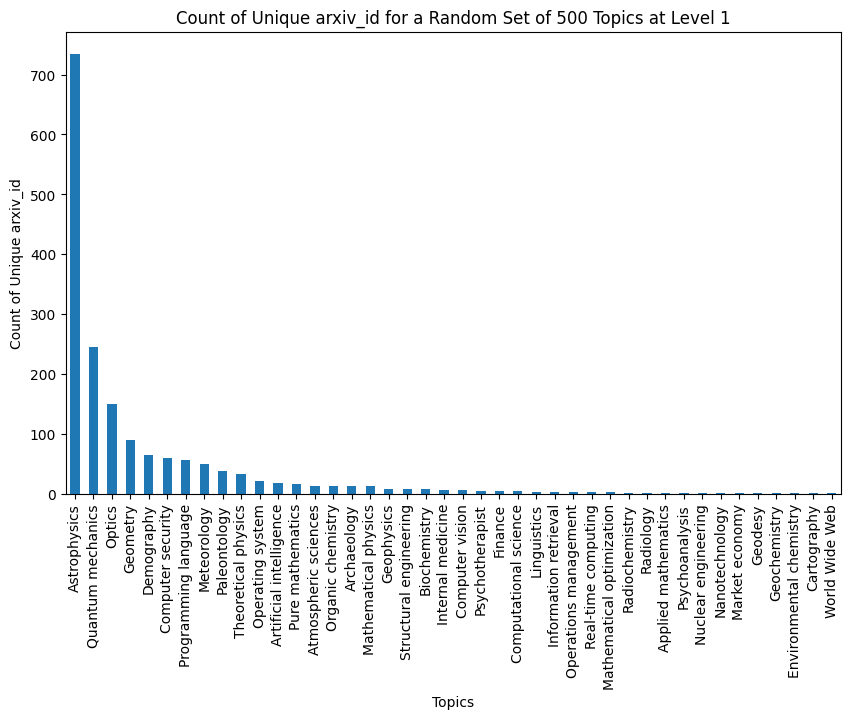

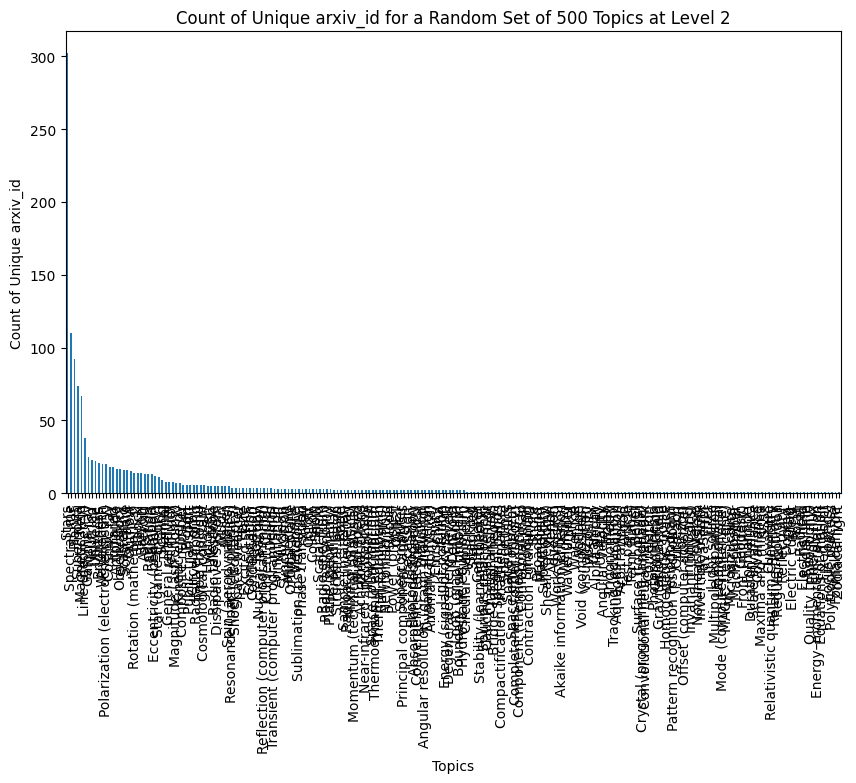

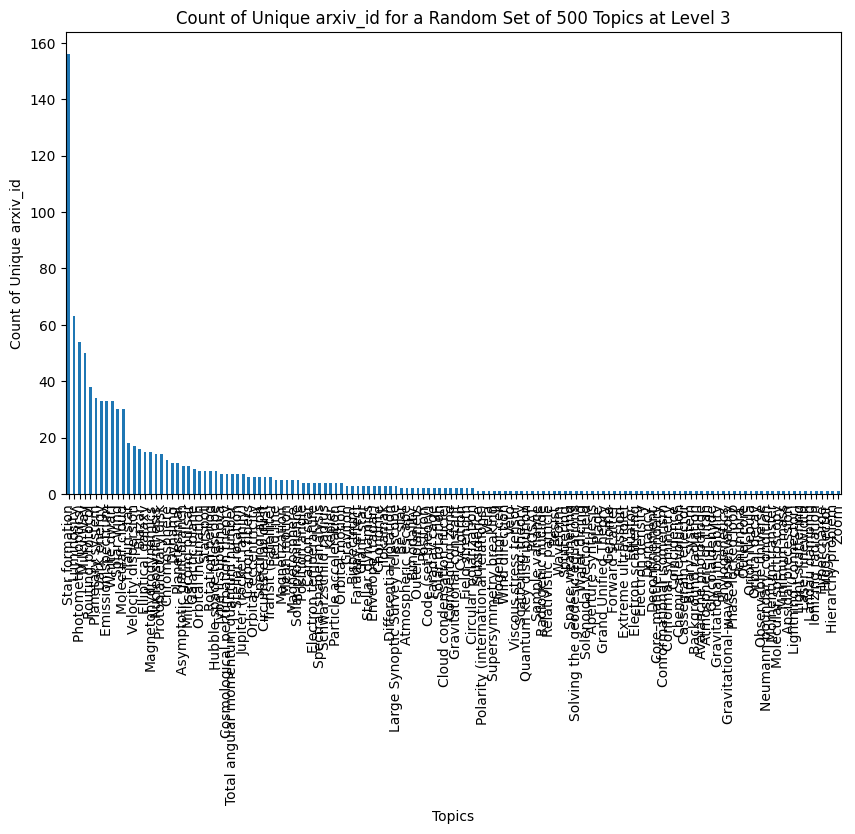

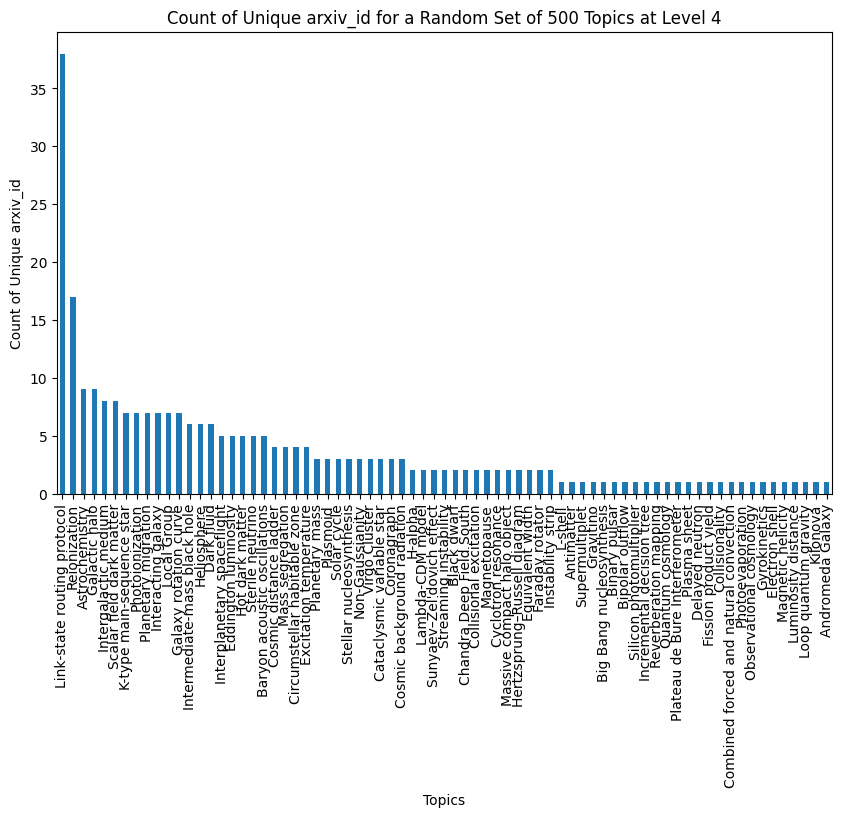

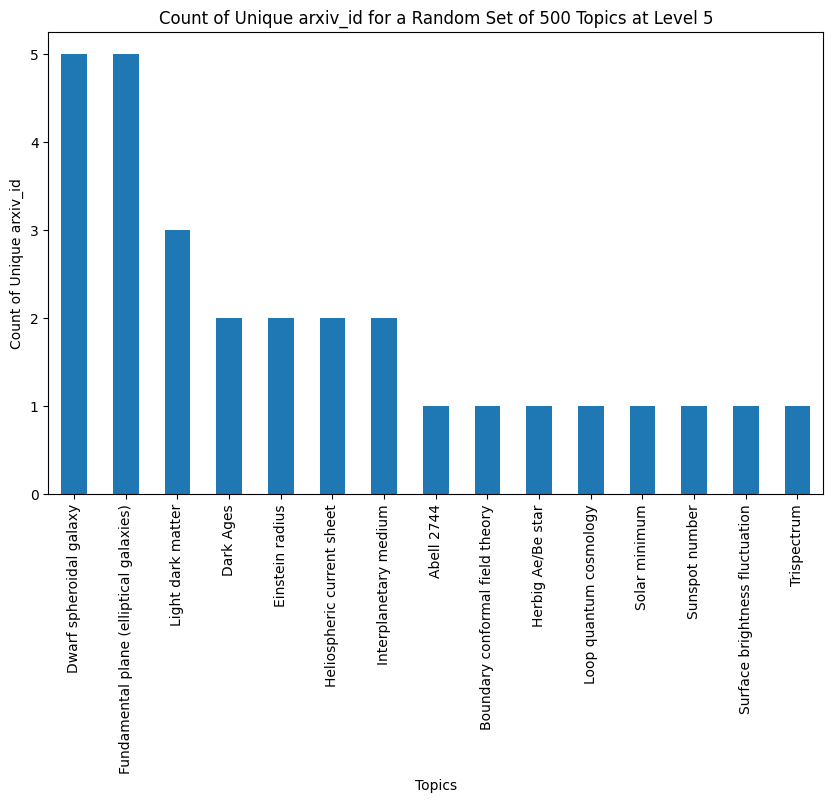

In [57]:
grouped_df = concept_df.groupby(['level', 'display_name'])['arxiv_id'].nunique().reset_index()

# Number of topics to display
N = 500

# Get a random set of N topics
random_topics = grouped_df['display_name'].drop_duplicates().sample(N).values

# Filter the dataframe to include only the random topics
filtered_df = grouped_df[grouped_df['display_name'].isin(random_topics)]

# Get unique levels
levels = sorted(filtered_df['level'].unique())

# Create a separate plot for each level
for level in levels:
    level_df = filtered_df[filtered_df['level'] == level]
    level_df = level_df.set_index('display_name').sort_values('arxiv_id', ascending=False)
    
    # Plot
    level_df['arxiv_id'].plot(kind='bar', figsize=(10, 6))
    plt.title(f"Count of Unique arxiv_id for a Random Set of {N} Topics at Level {level}")
    plt.xlabel("Topics")
    plt.ylabel("Count of Unique arxiv_id")
    plt.show()


In [27]:
concept_counts = {key: len(values) for key, values in concept_map.items()}

In [ ]:
concept_counts

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(concept_counts.keys(), concept_counts.values(), color='blue', alpha=0.7)
plt.title("Distribution of Values for Different Topics in Astrophysics")
plt.xlabel("Topics")
plt.ylabel("Values")
plt.show()


In [33]:
len(list(concept_map.keys()))

1428